## Graph function to plot histogram,box plot and bar plot for numerical and categorial variable

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os

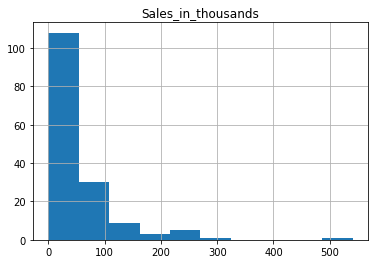

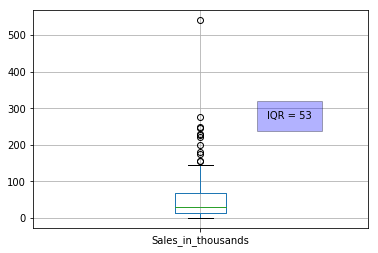

<Figure size 432x288 with 0 Axes>

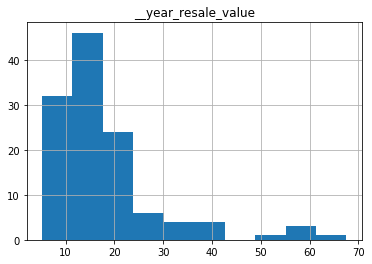

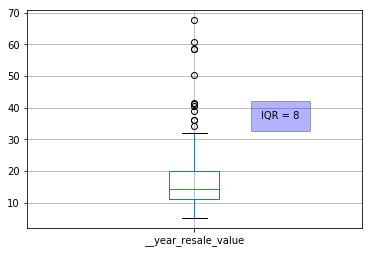

<Figure size 432x288 with 0 Axes>

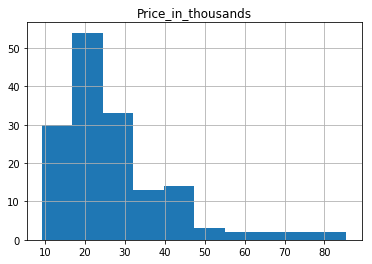

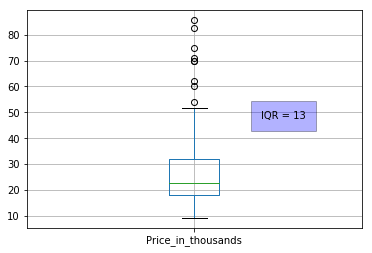

<Figure size 432x288 with 0 Axes>

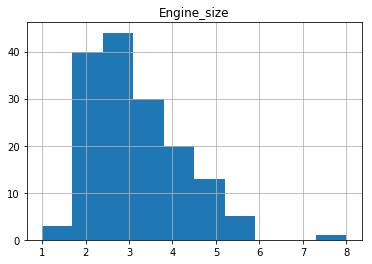

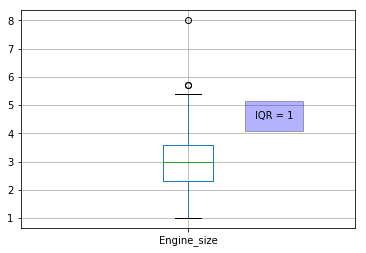

<Figure size 432x288 with 0 Axes>

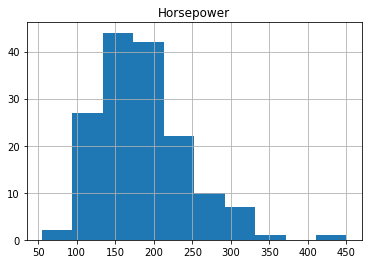

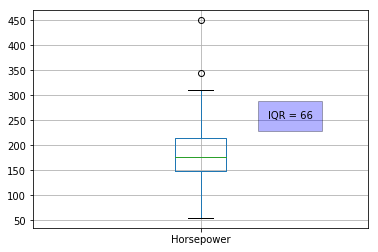

<Figure size 432x288 with 0 Axes>

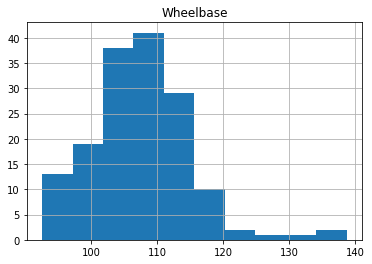

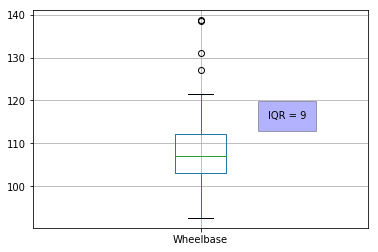

<Figure size 432x288 with 0 Axes>

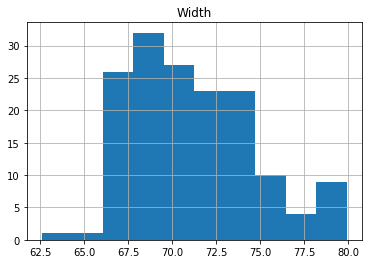

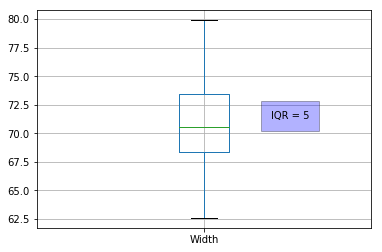

<Figure size 432x288 with 0 Axes>

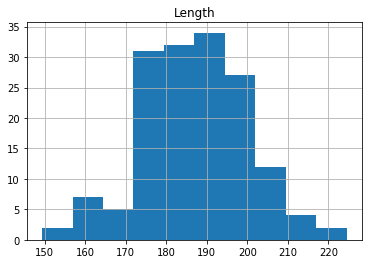

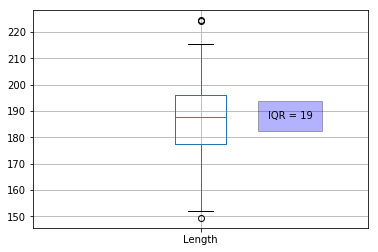

<Figure size 432x288 with 0 Axes>

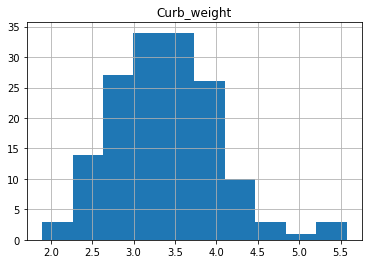

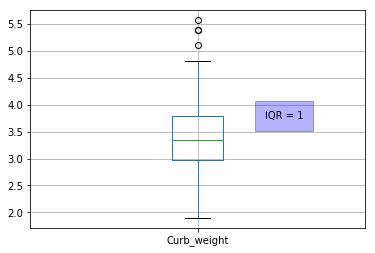

<Figure size 432x288 with 0 Axes>

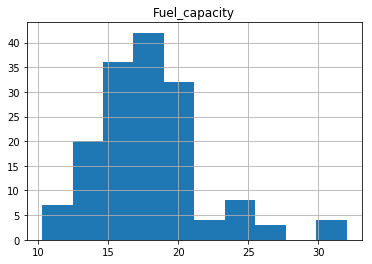

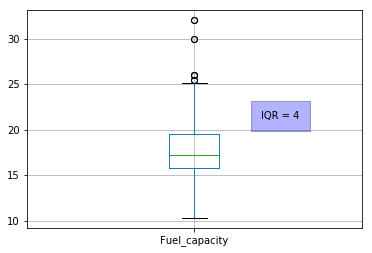

<Figure size 432x288 with 0 Axes>

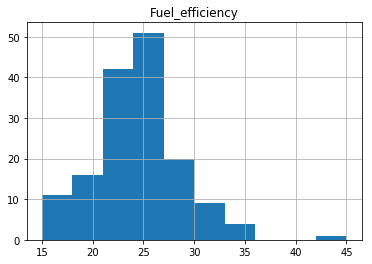

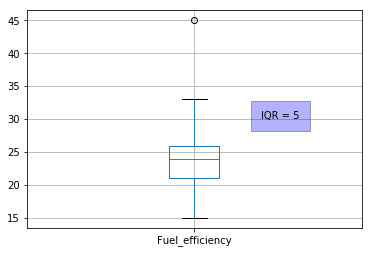

<Figure size 432x288 with 0 Axes>

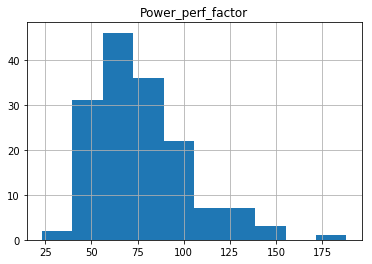

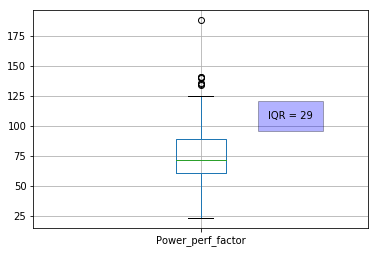

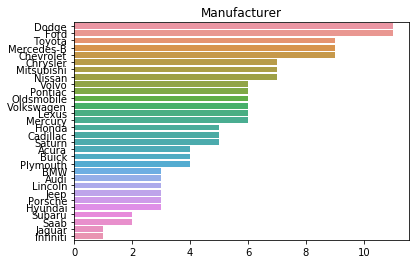

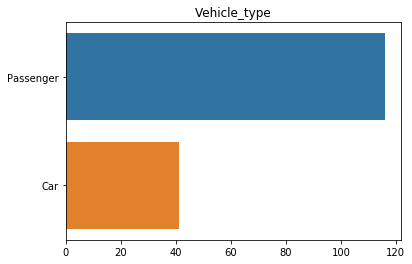

<Figure size 432x288 with 0 Axes>

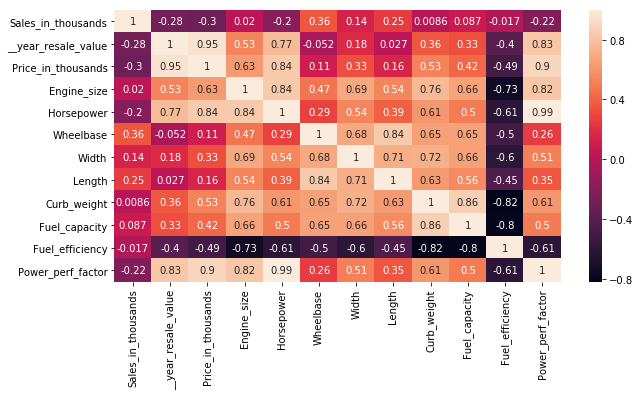

In [11]:
data = 'Car_sales.csv'
#COLUMNS = ['Length','Width','Vehicle_type','Manufacturer']
COLUMNS = None
directory = "C:\\Users\\ankit\\Desktop\\Praxis\\Graph"

def plot_graph(data,COLUMNS = None,directory=None): # Defining function plot_graph
    
    if directory == None:       # Selecting the directory
        os.getcwd()
        save_results_to = os.getcwd()
       
        
    else:
        os.chdir(directory)
        save_results_to = directory
    
    table = pd.read_csv(data)   # Reading the data and extracting list of all columns
    l = list(table.columns)
    n_columns = len(l)
    
    os.mkdir('Image_results')# Creating directory to store results
    
    if COLUMNS == None: # Plot histogram and Boxplot for Numerical Data when NO specific columns are specified
        for i in range(0,n_columns):
            datatype = table[l[i]].dtype
            if datatype == 'float64' or datatype == 'int64': # Verifying type of data
                
                histogram_name = save_results_to + '\\Image_results\\'+'hist_'+ l[i]+'.png'# full Path to each image
                table.hist(l[i])
                plt.savefig(histogram_name,dpi = 200) # Plotting and exporting histogram
                
                fig = plt.figure()
                ax = fig.add_subplot(111)
                boxplot_name = save_results_to + '\\Image_results\\' +'bxplt_'+ l[i] +'.png'
                table.boxplot(l[i])                 # Plotting Boxplot
                
                Quant25 = int(table[l[i]].quantile(0.25))
                Quant75 = int(table[l[i]].quantile(0.75))
                IQR = 'IQR = ' + str(Quant75-Quant25) # Determing IQR for the given column
                
                y_axis = ax.get_ylim()
                ymax = y_axis[1]
                ymin = y_axis[0]
                Yrange = ymax - ymin
                Yrange_compensated = ymin + (Yrange/2) # For ensuring correct positioning of text irrespective of data
                ax.text(1.2,Yrange_compensated,IQR,bbox = {'facecolor':'blue','alpha': 0.3,'pad':10})
                plt.savefig(boxplot_name,dpi = 200) # Plotting and exporting boxplot
                plt.show()
                plt.clf()
            else:
                continue
       
    else: # Plot histogram and Boxplot for Numerical Data when specific columns are specified
        
        custom_table = table[COLUMNS] # Extracting list of specific columns
        c_l = list(custom_table.columns)
        c_n_columns = len(c_l)
        
        for i in range(0,c_n_columns):
            c_datatype = table[c_l[i]].dtype
            if c_datatype == 'float64' or c_datatype == 'int64': # Verifying the type of data
                
                histogram_name = save_results_to + '\\Image_results\\' + 'hist_' + l[i] +'.png'
                custom_table.hist(c_l[i])
                plt.savefig(histogram_name,dpi = 200) # Plotting and exporting histogram
                
                fig = plt.figure()
                ax = fig.add_subplot(111)
                boxplot_name = save_results_to + '\\Image_results\\' +'bxplt_'+ l[i] +'.png'
                custom_table.boxplot(c_l[i])         # Plotting Boxplot
                
                Quant25 = int(custom_table[c_l[i]].quantile(0.25))
                Quant75 = int(custom_table[c_l[i]].quantile(0.75))
                IQR = 'IQR = ' + str(Quant75 - Quant25)  # Determining IQR for the given column
                
                y_axis = ax.get_ylim()
                ymax = y_axis[1]
                ymin = y_axis[0]
                Yrange = ymax - ymin
                Yrange_compensated = ymin + (Yrange/2) # For ensuring correct positioning of text irrespective of data
                ax.text(1.2,Yrange_compensated,IQR,bbox = {'facecolor':'blue','alpha': 0.3,'pad':10})
                
                plt.savefig(boxplot_name,dpi = 200) # Plotting and exporting boxplot
                plt.show()
                plt.clf()
    
    if COLUMNS == None: # Plot barplot for Categorical Data when NO specific columns are specified
        
        for i in range(0,n_columns):
            datatype = table[l[i]].dtype
            if datatype == 'object':      #Verifying the type of data and extracting unique variables
                unique_values = table[l[i]].unique()
                l_unique_values = len(table[l[i]].unique())
                
                if l_unique_values <= 30: # Constraining plot only for unique variables less than 30
                    barplot_name = save_results_to + '\\Image_results\\' +'barplt_'+ l[i] +'.png'
                    Xa = table[l[i]].value_counts().tolist()
                    Xb = table[l[i]].value_counts().keys().tolist()
                    sn.barplot(x = Xa,y = Xb,data = table)
                    plt.title(l[i])
                    plt.savefig(barplot_name,dpi = 200) # Plotting and exporting barplot
                    plt.show()
                    plt.clf()
                    
            else:
                continue

    else: # Plot barplot for Categorical Data when specific columns are specified
        
        custom_table = table[COLUMNS] # Extracting list of specific columns
        c_l = list(custom_table.columns)
        c_n_columns = len(c_l)   
        
        for i in range(0,c_n_columns):
            c_datatype = custom_table[c_l[i]].dtype
            
            if c_datatype == 'object': # Verifying the type of data
                barplot_name = save_results_to + '\\Image_results\\' +'barplt_'+ l[i] +'.png'
                Xa = custom_table[c_l[i]].value_counts().tolist()
                Xb = custom_table[c_l[i]].value_counts().keys().tolist()
                sn.barplot(x = Xa,y = Xb,data = custom_table)
                plt.title(c_l[i])
                plt.savefig(barplot_name,dpi = 200) # Plotting and exporting the barplot
                plt.show()
                plt.clf()
    plt.figure(figsize=(10,5))
    sn.heatmap(table.corr(), annot = True)
    heatmap_name = save_results_to + '\\Image_results\\' +'heatmap' +'.png'
    plt.savefig(heatmap_name,dpi = 200)


plot_graph(data,COLUMNS,directory)


## Improvisation 1: 
save the file as .py and call the file in new jupyter notebook as for real time data analysis we can't write every piece of code in one file we create code in different files and call it in a single file for code readability.

## Improvisation 2: 
Create heatmap using seaborn. The primary purpose of Heat Maps is to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most. 